In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 70.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/499A_Project/WINLI/train_400.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499A_Project/WINLI/train_200.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df1.head())

                                                text  \
0  I stuck a pin through a carrot. When I pulled ...   
1  John couldn't see the stage with Billy in fron...   
2  The police arrested all of the gang members. T...   
3  I couldn't put the pot on the shelf because it...   
4  We had hoped to place copies of our newsletter...   

                                              text.1  label  
0                             The carrot had a hole.      1  
1                                  John is so short.      1  
2  The police were trying to stop the drug trade ...      1  
3                              The pot was too tall.      1  
4  There were simply not enough copies of the new...      1  


In [ ]:
print(df2.head())

                                                text  \
0  I stuck a pin through a carrot. When I pulled ...   
1  John couldn't see the stage with Billy in fron...   
2  The police arrested all of the gang members. T...   
3  I couldn't put the pot on the shelf because it...   
4  We had hoped to place copies of our newsletter...   

                                              text.1  label  
0                             The carrot had a hole.      1  
1                                  John is so short.      1  
2  The police were trying to stop the drug trade ...      1  
3                              The pot was too tall.      1  
4  There were simply not enough copies of the new...      1  


In [ ]:
df1.label[df1.label == 1]="TRUE"
df1.label[df1.label == 0]="FALSE"

df2.label[df2.label == 1]="TRUE"
df2.label[df2.label == 0]="FALSE"

<ipython-input-7-af82ade73374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="TRUE"
<ipython-input-7-af82ade73374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="TRUE"


In [ ]:
# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('TRUE')]
df3 = df3.sample(n=200, replace=True)
df3["label"].value_counts()

FALSE    200
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('FALSE')]
df4 = df4.sample(n=200, replace=True)
df4["label"].value_counts()

TRUE    200
Name: label, dtype: int64

In [ ]:
frames = [df3, df4]

temp = pd.concat(frames)

In [ ]:
temp["label"].value_counts()

FALSE    200
TRUE     200
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('TRUE')]
df5 = df5.sample(n=50, replace=True)
df5["label"].value_counts()

FALSE    50
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('FALSE')]
df6 = df6.sample(n=50, replace=True)
df6["label"].value_counts()

TRUE    50
Name: label, dtype: int64

In [ ]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

In [ ]:
temp2["label"].value_counts()

FALSE    50
TRUE     50
Name: label, dtype: int64

In [ ]:
frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

In [ ]:
temp3["label"].value_counts()

FALSE    250
TRUE     250
Name: label, dtype: int64

In [ ]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [ ]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 39
	95percentile : 79
	99percentile : 97


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 40
	95percentile : 87
	99percentile : 109


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 71s 690ms/step - loss: 24.4121 - accuracy: 0.4949


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


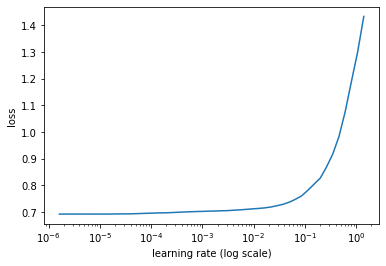

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
67/67 [==============================] - 68s 792ms/step - loss: 0.6934 - accuracy: 0.5250 - val_loss: 0.6893 - val_accuracy: 0.5200
Epoch 2/10
67/67 [==============================] - 50s 739ms/step - loss: 0.6552 - accuracy: 0.6375 - val_loss: 0.6622 - val_accuracy: 0.6000
Epoch 3/10
67/67 [==============================] - 50s 742ms/step - loss: 0.6016 - accuracy: 0.6975 - val_loss: 0.6597 - val_accuracy: 0.6100
Epoch 4/10
67/67 [==============================] - 50s 741ms/step - loss: 0.5651 - accuracy: 0.7350 - val_loss: 0.6859 - val_accuracy: 0.5900
Epoch 5/10
67/67 [==============================] - 50s 743ms/step - loss: 0.5537 - accuracy: 0.7425 - val_loss: 0.7411 - val_accuracy: 0.5700
Epoch 6/10
67/67 [==============================] - 50s 743ms/step - loss: 0.5005 - accuracy: 0.7750 - val_loss: 0.7394 - val_accuracy: 0.5900
Epoch 7/10
67/67 [==============================] - 50s 744ms/step - loss: 0.46

In [ ]:
class_names=["acpt","unac"]

In [ ]:
learner.validate(val_data=(val), class_names=class_names)

4/4 [==============================] - 4s 374ms/step
              precision    recall  f1-score   support

        acpt       0.72      0.57      0.64        51
        unac       0.63      0.78      0.70        49

    accuracy                           0.67       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.68      0.67      0.67       100



array([[29, 22],
       [11, 38]])

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 45s 675ms/step - loss: 9.3583 - accuracy: 0.6721


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


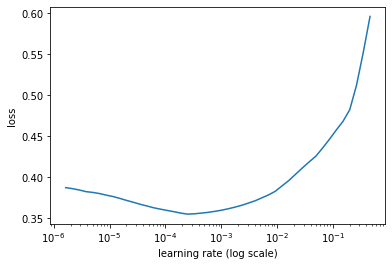

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

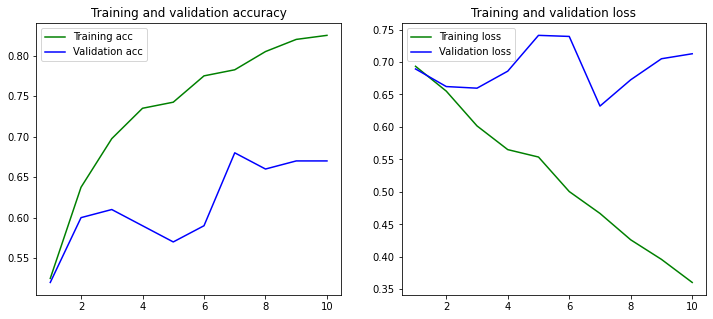

In [ ]:
PlotGraph(history)

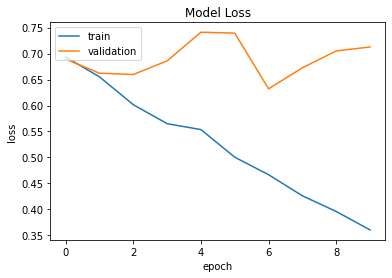

In [ ]:
learner.plot('loss')